# Preliminary Analysis/Parsing of TinyCamML Data

- Use full datalog available at https://docs.google.com/spreadsheets/d/1agveU5gW_giNmrqMYxw6tQje4F06gWyRcA8KjpXUVI0/edit?gid=0#gid=0. 
- Save as .csv then open in text editor (VS code). 
- In VS Code, remove quotation marks by finding and replacing with nothing. 
- In VS Code, Remove � symbol by finding and replacing with nothing. 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter

import datetime
import os

In [3]:
filepath = os.path.join('data', 'TinyCamML - Sheet1 - 20240812.csv')
df_full = pd.read_csv(filepath, header = None, parse_dates = [1])
df_full.columns = ['Device_ID', 'Datetime Transmission', 'Sensor', 'Event', 'Unix Time', 'Flood Status', 'Battery (V)']
df_full.head()

Device_ID Datetime Transmission       Sensor      Event  \
0  e00fce6861054efa74ac220c   2024-07-26 14:52:01  TinyCamML_1  FloodorNo   
1  e00fce6861054efa74ac220c   2024-07-26 15:02:40  TinyCamML_1  FloodorNo   
2  e00fce6861054efa74ac220c   2024-07-26 15:04:08  TinyCamML_1  FloodorNo   
3  e00fce6861054efa74ac220c   2024-07-26 15:09:43  TinyCamML_1  FloodorNo   
4  e00fce6861054efa74ac220c   2024-07-26 15:12:05  TinyCamML_1  FloodorNo   

    Unix Time Flood Status  Battery (V)  
0   946684800          NaN         4.32  
1   946684806        Flood         4.28  
2   946684806        Flood         4.29  
3   946684806        Flood         4.30  
4  1722021120        Flood         4.31

In [4]:
# Size before truncating
len(df_full)

1804

## Interpret Unix time and get rid of junk dates (i.e., before cell connection)

In [5]:
# Filter out bad dates (currently using 1722021120 or 7/26/2024)
df_full = df_full[df_full['Unix Time']>1722021120]

# to round off to nearest second
time_utc = pd.to_datetime(df_full.loc[:, 'Unix Time']*1000000000)
df_full.loc[:, 'Time (ET)'] = time_utc.dt.tz_localize('utc').dt.tz_convert('US/Eastern')
df_full['Water Level (cm)'] = np.zeros(len(df_full))

df_full.head()

Device_ID Datetime Transmission       Sensor      Event  \
5  e00fce6861054efa74ac220c   2024-07-26 15:18:12  TinyCamML_1  FloodorNo   
6  e00fce6861054efa74ac220c   2024-07-26 15:24:12  TinyCamML_1  FloodorNo   
7  e00fce6861054efa74ac220c   2024-07-26 15:30:12  TinyCamML_1  FloodorNo   
8  e00fce6861054efa74ac220c   2024-07-26 15:36:12  TinyCamML_1  FloodorNo   
9  e00fce6861054efa74ac220c   2024-07-26 15:42:12  TinyCamML_1  FloodorNo   

    Unix Time Flood Status  Battery (V)                 Time (ET)  \
5  1722021486        Flood         4.29 2024-07-26 15:18:06-04:00   
6  1722021846        Flood         4.27 2024-07-26 15:24:06-04:00   
7  1722022207        Flood         4.30 2024-07-26 15:30:07-04:00   
8  1722022567        Flood         4.31 2024-07-26 15:36:07-04:00   
9  1722022926        Flood         4.31 2024-07-26 15:42:06-04:00   

   Water Level (cm)  
5               0.0  
6               0.0  
7               0.0  
8               0.0  
9               0.0

In [6]:
# Size after truncating
len(df_full)

1793

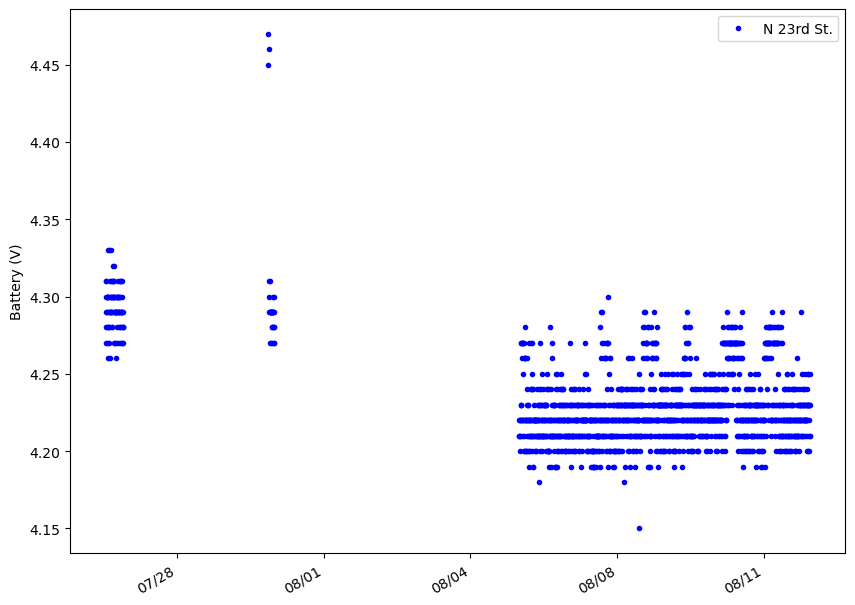

In [7]:
fig, axs = plt.subplots(figsize = (10, 8))
axs.plot(df_full['Time (ET)'], df_full['Battery (V)'], 'b.')#, label = 'N 23rd St.')

axs.set_ylabel('Battery (V)')
# axs.legend()

# xtick dates are poorly spaced
axs.xaxis.set_major_locator(ticker.MultipleLocator(3.5))

date_form = DateFormatter("%m/%d")
axs.xaxis.set_major_formatter(date_form)

fig.autofmt_xdate()